## Library Imports

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, classification_report,confusion_matrix
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import ConfusionMatrixDisplay
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import ConfusionMatrixDisplay
from sklearn.svm import SVC
import joblib
import os
import math 
import numpy as np


In [3]:
import sys
import os
sys.path.append(os.path.abspath(".."))

import src.mlflow_utils as mlu
dir(mlu)

['BASE_DIR',
 'MLRUNS_PATH',
 'MlflowClient',
 '__builtins__',
 '__cached__',
 '__doc__',
 '__file__',
 '__loader__',
 '__name__',
 '__package__',
 '__spec__',
 'mlflow',
 'np',
 'os',
 'pd',
 'register_best_model',
 'setup_experiment',
 'start_model_run']

In [4]:
from src.mlflow_utils import setup_experiment, start_model_run,register_best_model
import mlflow

# Data loading

In [5]:
df=pd.read_csv("../data/hand_landmarks_data.csv")

# Data exploration

In [6]:
df.head()

,x1,y1,z1,x2,y2,z2,x3,y3,z3,x4,...,x19,y19,z19,x20,y20,z20,x21,y21,z21,label
0,262.669968,257.304901,-3.649205e-07,257.417542,247.109055,0.004224,246.882957,241.716827,0.005798,236.384537,...,223.345093,255.490692,-0.020450,215.043365,258.114746,-0.024577,208.006393,259.608673,-0.026722,call
1,83.351778,346.059113,-2.345265e-07,81.925037,328.562347,-0.011102,90.080132,311.535248,-0.021096,95.641823,...,132.451618,341.794434,-0.038175,142.773582,342.829254,-0.037336,152.431698,343.015991,-0.036136,call
2,187.756977,260.235492,-2.417307e-07,195.460579,241.506035,-0.000184,207.259529,223.674339,-0.009687,215.413628,...,250.301010,268.602938,-0.044068,262.425133,271.276638,-0.040469,272.989952,272.272231,-0.038301,call
3,114.976696,331.594238,-1.233261e-07,114.503494,320.549957,-0.002824,116.636627,310.080994,-0.008911,117.685066,...,145.195450,329.357544,-0.027622,151.053200,329.712341,-0.027863,155.990364,329.548828,-0.027723,call
4,188.795288,141.727867,-1.622995e-07,188.520905,127.947464,-0.002884,191.982880,111.010563,-0.008115,192.552521,...,226.696396,132.263248,-0.025113,234.831741,130.684147,-0.024087,241.587769,128.477188,-0.023486,call


In [7]:
df.shape

(25675, 64)

In [8]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 25675 entries, 0 to 25674
Data columns (total 64 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   x1      25675 non-null  float64
 1   y1      25675 non-null  float64
 2   z1      25675 non-null  float64
 3   x2      25675 non-null  float64
 4   y2      25675 non-null  float64
 5   z2      25675 non-null  float64
 6   x3      25675 non-null  float64
 7   y3      25675 non-null  float64
 8   z3      25675 non-null  float64
 9   x4      25675 non-null  float64
 10  y4      25675 non-null  float64
 11  z4      25675 non-null  float64
 12  x5      25675 non-null  float64
 13  y5      25675 non-null  float64
 14  z5      25675 non-null  float64
 15  x6      25675 non-null  float64
 16  y6      25675 non-null  float64
 17  z6      25675 non-null  float64
 18  x7      25675 non-null  float64
 19  y7      25675 non-null  float64
 20  z7      25675 non-null  float64
 21  x8      25675 non-null  float64
 22

In [9]:
df.isnull().sum().sort_values(ascending=False)

x1       0
y1       0
y12      0
z12      0
x13      0
        ..
z9       0
x10      0
y10      0
z10      0
label    0
Length: 64, dtype: int64

In [10]:
df['label'].value_counts()

label
three2             1653
palm               1649
four               1634
ok                 1592
stop_inverted      1567
call               1506
peace_inverted     1497
stop               1482
rock               1458
three              1456
peace              1441
like               1436
two_up_inverted    1371
two_up             1343
dislike            1295
one                1263
mute               1087
fist                945
Name: count, dtype: int64

In [11]:
df.describe()

,x1,y1,z1,x2,y2,z2,x3,y3,z3,x4,...,z18,x19,y19,z19,x20,y20,z20,x21,y21,z21
count,25675.000000,25675.000000,2.567500e+04,25675.000000,25675.000000,25675.000000,25675.000000,25675.000000,25675.000000,25675.000000,...,25675.000000,25675.000000,25675.000000,25675.000000,25675.000000,25675.000000,25675.000000,25675.000000,25675.000000,25675.000000
mean,201.958632,260.158527,1.272461e-07,202.517395,252.115322,-0.009465,202.862981,240.645966,-0.015946,203.025267,...,-0.024129,201.792374,227.455597,-0.033751,201.811275,227.802576,-0.032208,201.874802,227.807287,-0.028828
std,90.500333,76.533210,2.737932e-07,84.770933,75.384691,0.010376,80.412089,74.721921,0.013973,79.647588,...,0.015658,94.046497,77.231210,0.020453,93.664595,78.441253,0.020877,93.547017,79.963438,0.021136
min,-36.050926,45.722923,-2.029986e-06,7.184681,51.256840,-0.096630,25.114323,45.489950,-0.155846,23.446341,...,-0.201897,0.198635,20.146784,-0.286821,3.278137,32.158108,-0.286470,-4.537216,23.226204,-0.262047
25%,124.110329,205.815950,-5.243216e-08,130.535929,197.999625,-0.015199,136.711035,187.018583,-0.023020,138.905817,...,-0.030728,126.828913,172.720392,-0.042726,126.887403,172.345467,-0.041957,126.356627,172.083794,-0.039220
50%,199.667847,255.181793,1.497277e-07,199.979530,247.113892,-0.008737,200.092758,235.776978,-0.014231,200.482040,...,-0.020969,197.579865,221.781479,-0.029942,197.591736,222.381149,-0.028510,197.453270,222.485229,-0.025269
75%,266.428482,304.991663,2.989988e-07,261.147457,296.850769,-0.002783,255.876354,284.925993,-0.007134,254.622768,...,-0.013661,268.103920,273.190765,-0.019987,267.745743,274.196884,-0.017971,267.324657,275.805222,-0.014294
max,633.556020,781.674469,1.876254e-06,606.232386,751.869416,0.076365,598.541348,719.365010,0.094131,607.999801,...,0.031774,632.923029,779.419948,0.078105,638.134761,760.854103,0.104580,641.788521,760.554894,0.118668


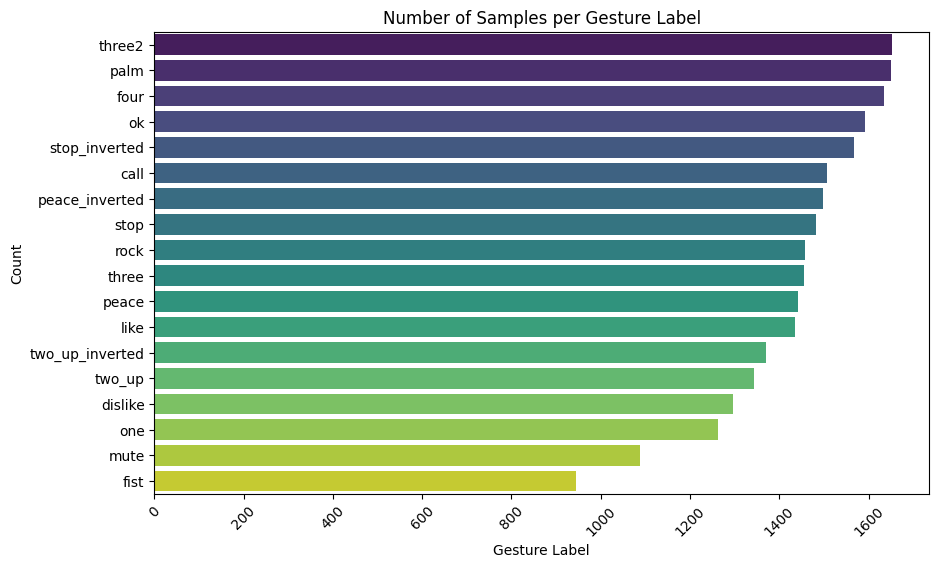

In [12]:
plt.figure(figsize=(10, 6))
sns.countplot(data=df, y='label', order=df['label'].value_counts().index, palette='viridis')
plt.title("Number of Samples per Gesture Label")
plt.xlabel("Gesture Label")
plt.ylabel("Count")
plt.xticks(rotation=45)
plt.show()


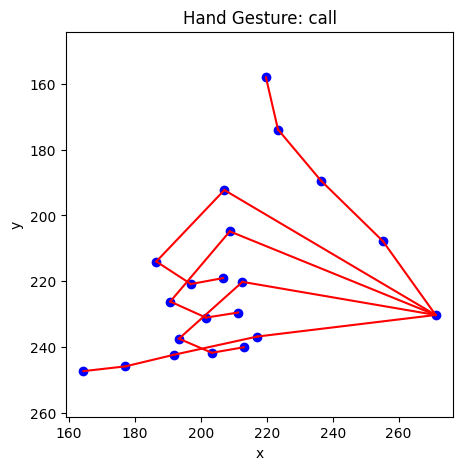

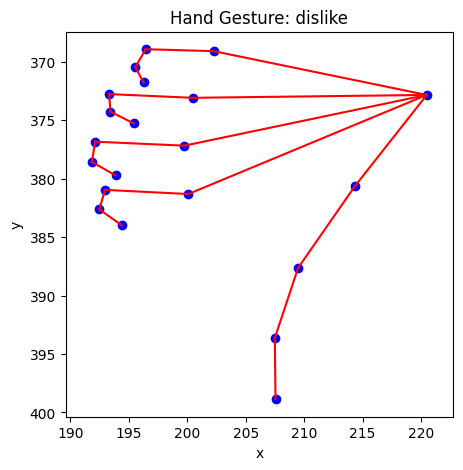

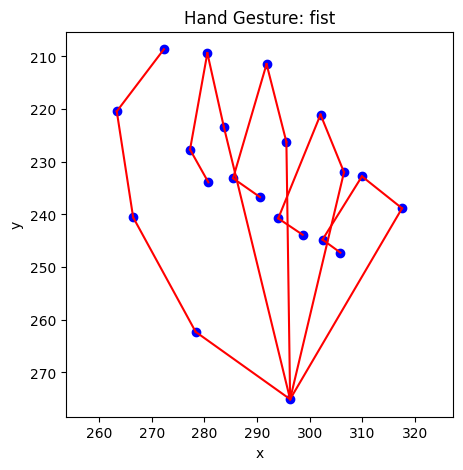

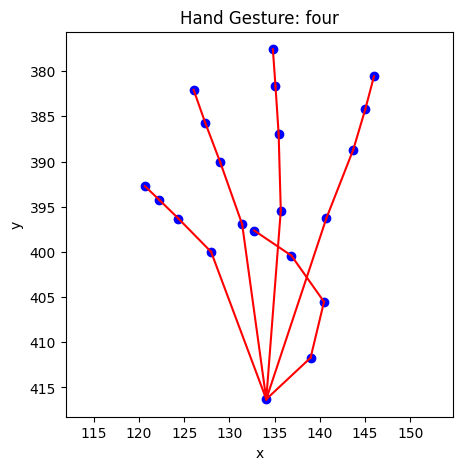

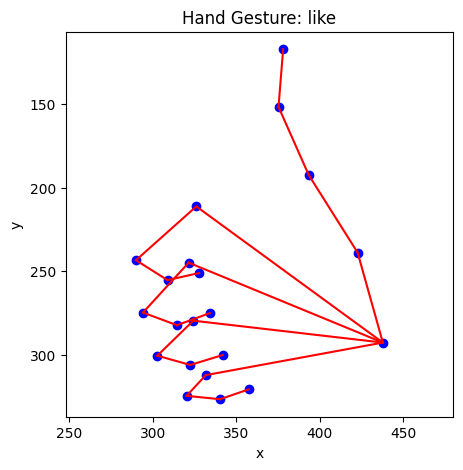

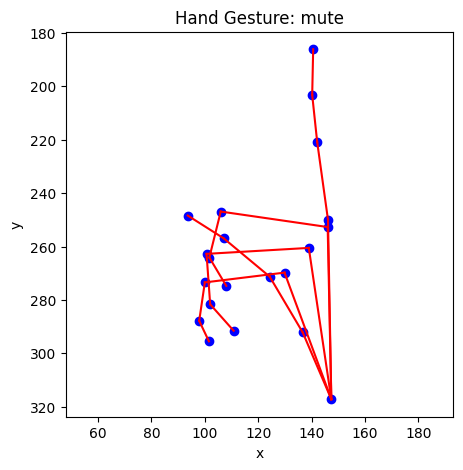

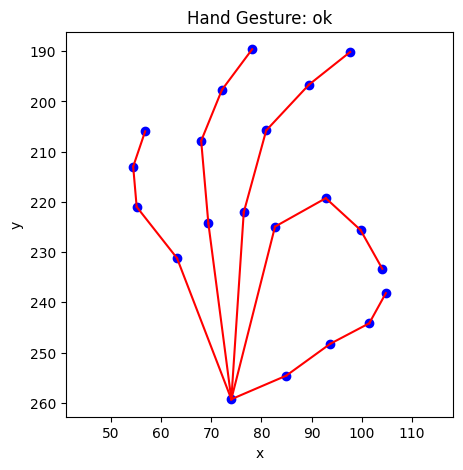

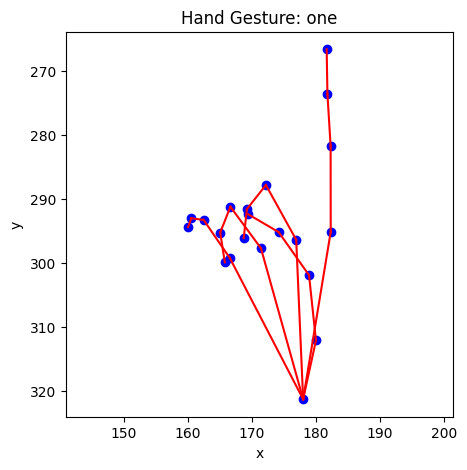

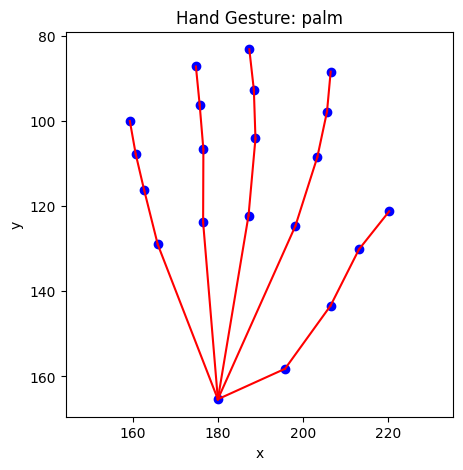

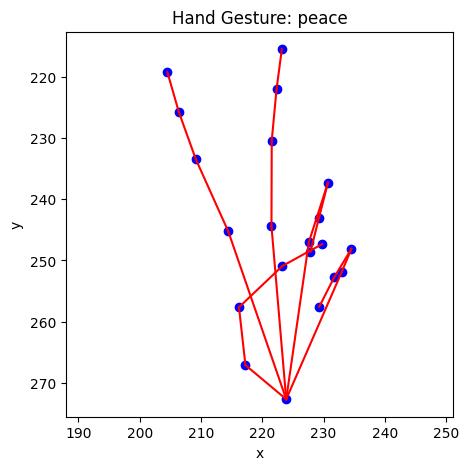

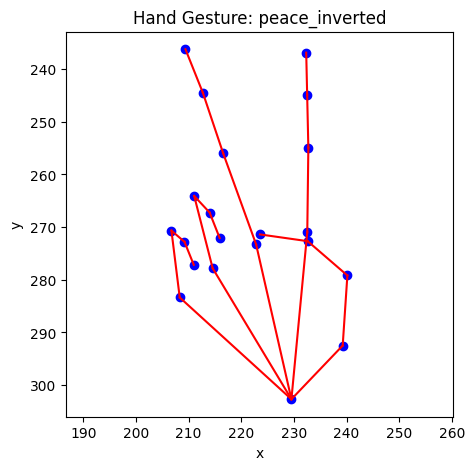

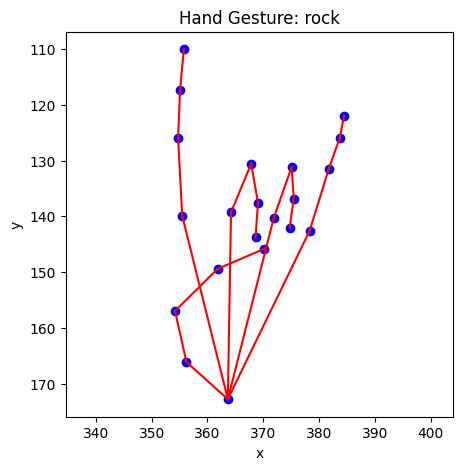

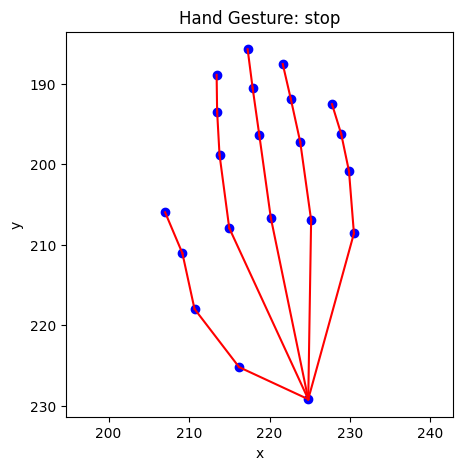

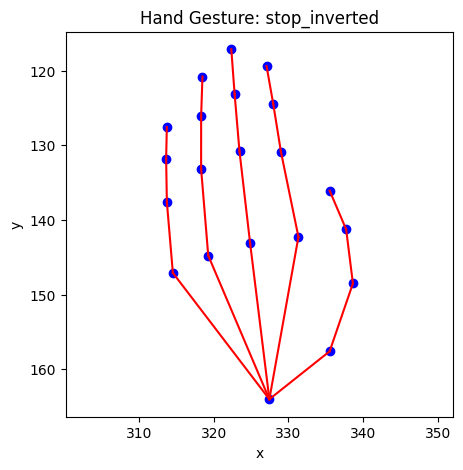

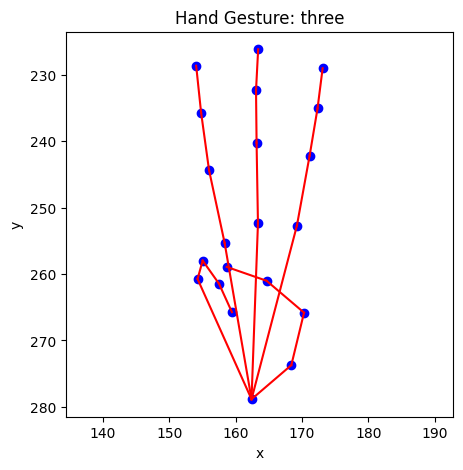

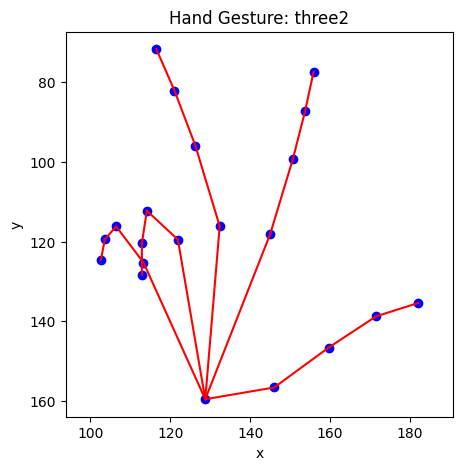

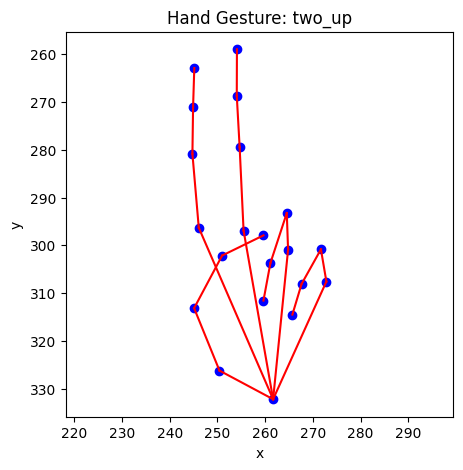

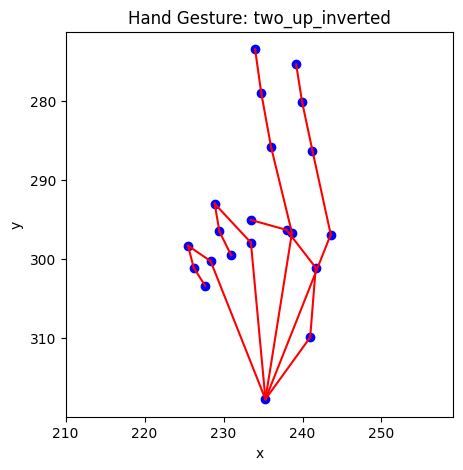

In [ ]:
x_cols = [col for col in df.columns if 'x' in col.lower()]
y_cols = [col for col in df.columns if 'y' in col.lower()]
z_cols = [col for col in df.columns if 'z' in col.lower()]
connections = [
    (0,1),(1,2),(2,3),(3,4),       
    (0,5),(5,6),(6,7),(7,8),       
    (0,9),(9,10),(10,11),(11,12),  
    (0,13),(13,14),(14,15),(15,16),
    (0,17),(17,18),(18,19),(19,20) 
]

for label in df['label'].unique():
    
    samples = df[df['label'] == label].sample(n=1, random_state=42)

    for idx, sample in samples.iterrows():
        x = sample[x_cols].values
        y = sample[y_cols].values
        z = sample[z_cols].values if len(z_cols) > 0 else None
        
        plt.figure(figsize=(5,5))
        
        plt.scatter(x, y, color='blue')
        
        for start, end in connections:
            plt.plot([x[start], x[end]], [y[start], y[end]], color='red')
        
        plt.title(f"Hand Gesture: {label}")
        plt.xlabel('x')
        plt.ylabel('y')
        plt.gca().invert_yaxis()
        plt.axis('equal') 
        plt.show()

### Preprocess Landmarks
- Reshape input to 21×3 (x, y, z)  
- Recenter using wrist (landmark 0)  
- Normalize by middle finger tip (landmark 12)  
- Flatten for model input

In [6]:
def preprocess_landmarks(sample):
    """
    sample: flat array of 63 values (21 landmarks × 3)
    returns: normalized flat array of 63 values
    """
    
    landmarks = sample.reshape(21, 3)
    landmarks = landmarks - landmarks[0]
    scale = np.linalg.norm(landmarks[12])

    if scale != 0:
        landmarks = landmarks / scale

    return landmarks.flatten()

### Encode Labels & Preprocess Features
- Encode string labels into numeric values.  
- Separate features (`X`) from labels (`y`).  
- Apply `preprocess_landmarks` to all samples for model-ready input.

In [7]:
le = LabelEncoder()
y = le.fit_transform(df['label'])
X = df.drop('label', axis=1).values
X_processed = np.array([preprocess_landmarks(sample) for sample in X])


### Split Dataset (60/20/20)
- **Training:** 60% of data  
- **Validation:** 20% of data  
- **Test:** 20% of data  
- Stratified splits maintain label distribution across all sets.

In [8]:
X_train_val, X_test, y_train_val, y_test = train_test_split(X_processed, y, test_size=0.2, random_state=42, stratify=y)
X_train, X_val, y_train, y_val = train_test_split(X_train_val, y_train_val, test_size=0.25, random_state=42, stratify=y_train_val)

### Setup MLflow Experiment
- Initialize or set the experiment for logging all runs.  
- Experiment name: `Hand_Gesture_Classification_Experiment`.

In [9]:
setup_experiment("Hand_Gesture_Classification_Exp")

### Define Models
- Initialize machine learning models with chosen hyperparameters:

In [11]:
models = {
    "RandomForest": RandomForestClassifier(n_estimators=100, random_state=42),
    "SVM": SVC(kernel='rbf',C=10,gamma=.1, random_state=42),
    "KNN": KNeighborsClassifier(n_neighbors=5)  
}

### Train Models & Log Results
- Create directories for saving models and confusion matrices.  
- Train each model on the training set and evaluate on validation data.  
- Compute and print validation metrics: accuracy, precision, recall, F1-score, and classification report.  
- Generate and save confusion matrix plots for each model.  
- Log model runs, parameters, metrics, and artifacts.  
- Save trained model for future use.

In [12]:
os.makedirs("../models", exist_ok=True)
os.makedirs("../models/confusion_matrices", exist_ok=True)
results = []
for name, model in models.items():
    print(f"\n--- Training {name} ---")

    model.fit(X_train, y_train)
    y_val_pred = model.predict(X_val)

    val_acc = accuracy_score(y_val, y_val_pred)
    val_prec = precision_score(y_val, y_val_pred, average='weighted', zero_division=0)
    val_rec = recall_score(y_val, y_val_pred, average='weighted', zero_division=0)
    val_f1 = f1_score(y_val, y_val_pred, average='weighted', zero_division=0)

    print(f"Validation Metrics for {name}:")
    print(classification_report(y_val, y_val_pred, zero_division=0))

    metrics = {
        "val_accuracy": val_acc,
        "val_precision": val_prec,
        "val_recall": val_rec,
        "val_f1_score": val_f1
    }
    

    labels = le.classes_ 
    fig, ax = plt.subplots(figsize=(20, 15))
    y_val_original = le.inverse_transform(y_val)     
    y_val_pred_original = le.inverse_transform(y_val_pred)
    cm = confusion_matrix(y_val_original, y_val_pred_original, labels=labels)
    disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=labels)
    disp.plot(ax=ax, cmap=plt.cm.Blues, xticks_rotation=45, values_format='d')
    plt.title(f'Confusion Matrix - {name}')
    cm_filename = f"../models/confusion_matrices/{name}_confusion_matrix.png"
    plt.savefig(cm_filename)
    plt.close()
    print(f"Saved confusion matrix to {cm_filename}")

    params = model.get_params()

    encoder_path = "../models/label_encoder.pkl"
    joblib.dump(le, encoder_path)
    print(f"Saved label encoder to {encoder_path}")
    artifacts = [cm_filename, encoder_path]  

    start_model_run(
        run_name=f"{name}_Model_Run",
        model=model,
        params=params,
        metrics=metrics,
        artifacts=artifacts,         
        X_train=X_train,                   
        y_train=y_train,

    )

    model_filename = f"../models/{name}.pkl"
    joblib.dump(model, model_filename)
    print(f"Saved {name} model to {model_filename}")


--- Training RandomForest ---
Validation Metrics for RandomForest:
              precision    recall  f1-score   support

           0       0.99      1.00      0.99       301
           1       1.00      1.00      1.00       259
           2       0.99      0.99      0.99       189
           3       0.96      0.97      0.97       327
           4       1.00      0.99      0.99       287
           5       0.97      0.99      0.98       217
           6       1.00      0.99      0.99       319
           7       0.97      0.97      0.97       253
           8       0.97      0.96      0.96       330
           9       0.96      0.95      0.96       288
          10       0.96      0.96      0.96       299
          11       1.00      0.98      0.99       292
          12       0.93      0.97      0.95       296
          13       0.99      1.00      0.99       313
          14       0.99      0.95      0.97       291
          15       0.99      0.99      0.99       331
          16 

2026/02/23 20:52:02 WARNING mlflow.models.model: `artifact_path` is deprecated. Please use `name` instead.
c:\Users\merna\AppData\Local\Programs\Python\Python39\lib\site-packages\tqdm\auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm
c:\Users\merna\AppData\Local\Programs\Python\Python39\lib\site-packages\mlflow\types\utils.py:452: UserWarning: Hint: Inferred schema contains integer column(s). Integer columns in Python cannot represent missing values. If your input data contains missing values at inference time, it will be encoded as floats and will cause a schema enforcement error. The best way to avoid this problem is to infer the model schema based on a realistic data sample (training dataset) that includes missing values. Alternatively, you can declare integer columns as doubles (float64) whenever these columns may have missing values.

Saved RandomForest model to ../models/RandomForest.pkl

--- Training SVM ---
Validation Metrics for SVM:
              precision    recall  f1-score   support

           0       0.98      0.99      0.99       301
           1       1.00      1.00      1.00       259
           2       1.00      0.99      1.00       189
           3       0.97      0.99      0.98       327
           4       0.99      0.98      0.99       287
           5       0.97      1.00      0.98       217
           6       1.00      0.99      0.99       319
           7       0.98      0.97      0.97       253
           8       0.98      0.97      0.97       330
           9       0.96      0.96      0.96       288
          10       1.00      0.96      0.98       299
          11       1.00      0.98      0.99       292
          12       0.92      0.97      0.95       296
          13       0.98      0.97      0.97       313
          14       1.00      0.97      0.98       291
          15       0.99      0

2026/02/23 20:52:22 WARNING mlflow.models.model: `artifact_path` is deprecated. Please use `name` instead.


Saved confusion matrix to ../models/confusion_matrices/SVM_confusion_matrix.png
Saved label encoder to ../models/label_encoder.pkl


c:\Users\merna\AppData\Local\Programs\Python\Python39\lib\site-packages\mlflow\types\utils.py:452: UserWarning: Hint: Inferred schema contains integer column(s). Integer columns in Python cannot represent missing values. If your input data contains missing values at inference time, it will be encoded as floats and will cause a schema enforcement error. The best way to avoid this problem is to infer the model schema based on a realistic data sample (training dataset) that includes missing values. Alternatively, you can declare integer columns as doubles (float64) whenever these columns may have missing values. See `Handling Integers With Missing Values <https://www.mlflow.org/docs/latest/models.html#handling-integers-with-missing-values>`_ for more details.
  warnings.warn(


Saved SVM model to ../models/SVM.pkl

--- Training KNN ---
Validation Metrics for KNN:
              precision    recall  f1-score   support

           0       0.98      0.99      0.99       301
           1       1.00      1.00      1.00       259
           2       1.00      0.99      1.00       189
           3       0.96      0.99      0.97       327
           4       0.99      0.98      0.99       287
           5       0.96      1.00      0.98       217
           6       1.00      0.99      0.99       319
           7       0.98      0.96      0.97       253
           8       0.98      0.97      0.98       330
           9       0.96      0.96      0.96       288
          10       0.99      0.94      0.96       299
          11       1.00      0.98      0.99       292
          12       0.89      0.95      0.92       296
          13       0.95      0.93      0.94       313
          14       0.99      0.96      0.98       291
          15       0.99      1.00      0.99     

2026/02/23 20:52:29 WARNING mlflow.models.model: `artifact_path` is deprecated. Please use `name` instead.


Saved confusion matrix to ../models/confusion_matrices/KNN_confusion_matrix.png
Saved label encoder to ../models/label_encoder.pkl


Saved KNN model to ../models/KNN.pkl


c:\Users\merna\AppData\Local\Programs\Python\Python39\lib\site-packages\mlflow\types\utils.py:452: UserWarning: Hint: Inferred schema contains integer column(s). Integer columns in Python cannot represent missing values. If your input data contains missing values at inference time, it will be encoded as floats and will cause a schema enforcement error. The best way to avoid this problem is to infer the model schema based on a realistic data sample (training dataset) that includes missing values. Alternatively, you can declare integer columns as doubles (float64) whenever these columns may have missing values. See `Handling Integers With Missing Values <https://www.mlflow.org/docs/latest/models.html#handling-integers-with-missing-values>`_ for more details.
  warnings.warn(


### Register Best Model
- Register the top-performing model from the experiment.  
- Selection based on **highest validation F1-score**.  
- Model registered as `Hand_Gesture_Classifier`.

In [15]:
register_best_model(
    experiment_name="Hand_Gesture_Classification_Exp",
    metric_name="val_f1_score",
    registered_model_name="HandGesture_Classifier"
)

Successfully registered model 'HandGesture_Classifier'.
2026/02/23 15:22:50 WARNING mlflow.tracking._model_registry.fluent: Run with id 1c62bbe77ee4433c9b1d5af4118dc201 has no artifacts at artifact path 'model', registering model based on models:/m-a4231b0384fe4bccab2f5aebfcaba42e instead
Created version '1' of model 'HandGesture_Classifier'.
c:\Users\merna\Desktop\Hand_Gesture_Classification\src\mlflow_utils.py:60: FutureWarning: ``mlflow.tracking.client.MlflowClient.transition_model_version_stage`` is deprecated since 2.9.0. Model registry stages will be removed in a future major release. To learn more about the deprecation of model registry stages, see our migration guide here: https://mlflow.org/docs/latest/model-registry.html#migrating-from-stages
  client.transition_model_version_stage(


'1c62bbe77ee4433c9b1d5af4118dc201'

In [13]:
for name, model in models.items():
    pipeline = joblib.load(f"../models/{name}.pkl")
    y_test_pred = pipeline.predict(X_test)
    test_acc = accuracy_score(y_test, y_test_pred)
    print(f"{name} Test Accuracy: {test_acc:.4f}")


RandomForest Test Accuracy: 0.9739
SVM Test Accuracy: 0.9809
KNN Test Accuracy: 0.9753
